In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from statistics import mean

# load dataset
df = pd.read_csv('data.csv')

# drop the column id
df = df.drop(columns=['id'])

# Fill bmi with mean
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

X, y = df.drop('stroke', axis=1), df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test = X_test.assign(stroke=y_test)
X_test.to_csv('test.csv', index=False)

df = X_train.assign(stroke=y_train)

# For each of the categorical attribtues, encode the set of categories to be 0 ~ (n_classes - 1)
cats = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
encoder = OrdinalEncoder()
df[cats] = encoder.fit_transform(df[cats])
df = pd.get_dummies(df, columns = ["work_type", "Residence_type"], dtype=int) 

# normalize numerical data using the min-max normalization technique
num = ["age", "avg_glucose_level", "bmi"]
scaler = MinMaxScaler(feature_range=(0, 1))
df[num] = scaler.fit_transform(df[num])

# Split data into features and target
X = df.drop('stroke', axis=1)
y = df['stroke']

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
x_os, y_os = smote.fit_resample(X, y)

In [111]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 10, n_estimators = 14, random_state=42)
f1 = []
recall = []
precision = []
accuracy = []
for i in range(0,9):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    x_os, y_os = smote.fit_resample(X_train, y_train)
    rf.fit(x_os, y_os)
    y_pred = rf.predict(X_test)
    f1.append(f1_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    accuracy.append(accuracy_score(y_test, y_pred))
print('f1_mean =', mean(f1))
print('recall_mean =', mean(recall))
print('precision_mean =', mean(precision))
print('accuracy_mean =', mean(accuracy))
Random_forest = [mean(f1), mean(recall), mean(precision), mean(accuracy)]


f1_mean = 0.20060616081957242
recall_mean = 0.5207650918435232
precision_mean = 0.12450139765841058
accuracy_mean = 0.8234175495789188


In [112]:
from sklearn.linear_model import LogisticRegression

cls = LogisticRegression(C = 1, max_iter = 100, solver = 'newton-cg')
f1 = []
recall = []
precision = []
accuracy = []
for i in range(0,9):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    x_os, y_os = smote.fit_resample(X_train, y_train)
    cls.fit(x_os, y_os)
    y_pred = cls.predict(X_test)
    f1.append(f1_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    accuracy.append(accuracy_score(y_test, y_pred))
print('f1_mean =', mean(f1))
print('recall_mean =', mean(recall))
print('precision_mean =', mean(precision))
print('accuracy_mean =', mean(accuracy))
Logistic_Regression = [mean(f1), mean(recall), mean(precision), mean(accuracy)]

f1_mean = 0.1881939980417822
recall_mean = 0.672609241400091
precision_mean = 0.10952283103507039
accuracy_mean = 0.7541428959521869


In [113]:
from sklearn.svm import SVC

svc = SVC(C = 100, gamma = 1, kernel = "rbf")
f1 = []
recall = []
precision = []
accuracy = []
for i in range(0,9):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    x_os, y_os = smote.fit_resample(X_train, y_train)
    svc.fit(x_os, y_os)
    y_pred = svc.predict(X_test)
    f1.append(f1_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    accuracy.append(accuracy_score(y_test, y_pred))
print('f1_mean =', mean(f1))
print('recall_mean =', mean(recall))
print('precision_mean =', mean(precision))
print('accuracy_mean =', mean(accuracy))
SVM_machine = [mean(f1), mean(recall), mean(precision), mean(accuracy)]

f1_mean = 0.1065752435944519
recall_mean = 0.20792566184723046
precision_mean = 0.0718919814536149
accuracy_mean = 0.8556098886172236


In [114]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes = (15, 10), max_iter = 1000)
f1 = []
recall = []
precision = []
accuracy = []
for i in range(0,9):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    x_os, y_os = smote.fit_resample(X_train, y_train)
    mlp.fit(x_os, y_os)
    y_pred = mlp.predict(X_test)
    f1.append(f1_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    accuracy.append(accuracy_score(y_test, y_pred))
print('f1_mean =', mean(f1))
print('recall_mean =', mean(recall))
print('precision_mean =', mean(precision))
print('accuracy_mean =', mean(accuracy))
Neuron_netwerk = [mean(f1), mean(recall), mean(precision), mean(accuracy)]

f1_mean = 0.16579961283863043
recall_mean = 0.4458249327530373
precision_mean = 0.10242463197101681
accuracy_mean = 0.8103776147785927


In [118]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB(var_smoothing = 0.001)
f1 = []
recall = []
precision = []
accuracy = []
for i in range(0,9):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    x_os, y_os = smote.fit_resample(X_train, y_train)
    gnb.fit(x_os, y_os)
    y_pred = gnb.predict(X_test)
    f1.append(f1_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    accuracy.append(accuracy_score(y_test, y_pred))
print('f1_mean =', mean(f1))
print('recall_mean =', mean(recall))
print('precision_mean =', mean(precision))
print('accuracy_mean =', mean(accuracy))
naive_bayes = [mean(f1), mean(recall), mean(precision), mean(accuracy)]

f1_mean = 0.13926399435339484
recall_mean = 0.916215362947389
precision_mean = 0.07541212260200778
accuracy_mean = 0.5198315675088291


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 3, weights = 'distance')
f1 = []
recall = []
precision = []
accuracy = []
for i in range(0,9):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    x_os, y_os = smote.fit_resample(X_train, y_train)
    knn.fit(x_os, y_os)
    y_pred = knn.predict(X_test)
    f1.append(f1_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    accuracy.append(accuracy_score(y_test, y_pred))
print('f1_mean =', mean(f1))
print('recall_mean =', mean(recall))
print('precision_mean =', mean(precision))
print('accuracy_mean =', mean(accuracy))
K_Neighbor = [mean(f1), mean(recall), mean(precision), mean(accuracy)]

f1_mean = 0.12603538714065887
recall_mean = 0.24123458226472666
precision_mean = 0.08582847592809295
accuracy_mean = 0.8497690844879109


In [ ]:
from sklearn.ensemble import StackingClassifier
base_models = [
    ('rf', RandomForestClassifier(max_depth = 10, n_estimators = 14, random_state=42)),  # Random Forest
    ('cls', LogisticRegression(max_iter=1000)),  # Logistic Regression
    ('svc', SVC(C = 100, gamma = 1, kernel = "rbf")),  # SVM with linear kernel
    ('gnb', GaussianNB(var_smoothing = 0.001)),  # Gaussian Naive Bayes
    ('knn', KNeighborsClassifier(metric = 'manhattan', n_neighbors = 3, weights = 'distance')),  # k-Nearest Neighbors
    ('mlp', MLPClassifier(hidden_layer_sizes = (15, 10), max_iter = 1000))  # Multilayer Perceptron
]
final_estimator = RandomForestClassifier(max_depth = 10, n_estimators = 14, random_state=42)
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=final_estimator)
f1 = []
recall = []
precision = []
accuracy = []
for i in range(0,9):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    x_os, y_os = smote.fit_resample(X_train, y_train)
    stacking_classifier.fit(x_os, y_os)
    y_pred = stacking_classifier.predict(X_test)
    f1.append(f1_score(y_test, y_pred))
    recall.append(recall_score(y_test, y_pred))
    precision.append(precision_score(y_test, y_pred))
    accuracy.append(accuracy_score(y_test, y_pred))
print('f1_mean =', mean(f1))
print('recall_mean =', mean(recall))
print('precision_mean =', mean(precision))
print('accuracy_mean =', mean(accuracy))
staking_approach = [mean(f1), mean(recall), mean(precision), mean(accuracy)]

f1_mean = 0.10614822647688862
recall_mean = 0.14346295281397584
precision_mean = 0.08658153671106923
accuracy_mean = 0.9023363216517251


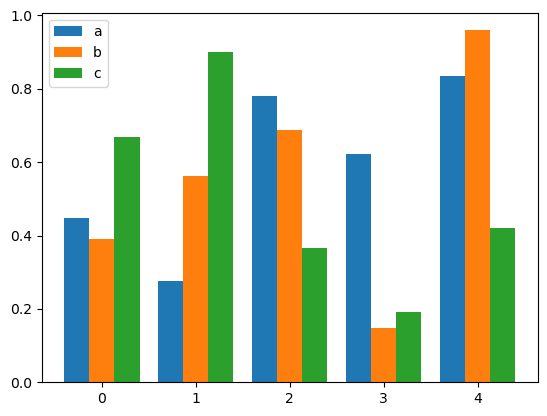

In [6]:
#graph
import matplotlib.pyplot as plt
size = 5
x = []


total_width, n = 0.8, 3
width = total_width / n
x = x - (total_width - width) / 2

plt.bar(x, a,  width=width, label='a')
plt.bar(x + width, b, width=width, label='b')
plt.bar(x + 2 * width, c, width=width, label='c')
plt.legend()
plt.show()

In [ ]:
#prepare
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
rf = RandomForestClassifier(max_depth = 10, n_estimators = 14, random_state=42)
cls = LogisticRegression(max_iter=1000)
svc = SVC(C = 100, gamma = 1, kernel = "rbf")
mlp = MLPClassifier(hidden_layer_sizes = (15, 10), max_iter = 1000)
gnb = GaussianNB(var_smoothing = 0.001)
knn = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 3, weights = 'distance')
base_models = [
    ('rf', RandomForestClassifier(max_depth = 10, n_estimators = 14, random_state=42)),  # Random Forest
    ('cls', LogisticRegression(max_iter=1000)),  # Logistic Regression
    ('svc', SVC(C = 100, gamma = 1, kernel = "rbf")),  # SVM with linear kernel
    ('gnb', GaussianNB(var_smoothing = 0.001)),  # Gaussian Naive Bayes
    ('knn', KNeighborsClassifier(metric = 'manhattan', n_neighbors = 3, weights = 'distance')),  # k-Nearest Neighbors
    ('mlp', MLPClassifier(hidden_layer_sizes = (15, 10), max_iter = 1000))  # Multilayer Perceptron
]
final_estimator = RandomForestClassifier(max_depth = 10, n_estimators = 14, random_state=42)
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=final_estimator)
#fitting
rf = rf.fit(x_os,y_os)
cls = cls.fit(x_os,y_os)
svc = svc.fit(x_os,y_os)
mlp = mlp.fit(x_os,y_os)
gnb = gnb.fit(x_os,y_os)
knn = knn.fit(x_os,y_os)
stacking_classifier = stacking_classifier.fit(x_os,y_os)

In [ ]:
from joblib import dump

dump(rf, 'models/rf_model.joblib')
dump(cls, 'models/cls_model.joblib')
dump(svc, 'models/svc_model.joblib')
dump(mlp, 'models/mlp_model.joblib')
dump(gnb, 'models/gnb_model.joblib')
dump(knn, 'models/knn_model.joblib')
dump(stacking_classifier, 'models/stacking_classifier_model.joblib')

dump(scaler, 'scaler/scaler.joblib')

dump(encoder, 'encoder/encoder.joblib')

['encoder/encoder.joblib']